# Superposition Relaxation Arithmetic for Factorable Functions

A superposition relaxation of the function $f:\mathcal{X}\to\mathbb{R}$ on the convex domain $\mathcal{X}\subseteq \mathbb{R}^n$ is a pair of functions $f^{\rm u},f^{\rm o}:\mathcal{X}\to \mathbb{R}$ that (i) are separable,
\begin{align*}
\forall {\bf x}\in\mathcal{X}, \quad f^{\rm u}({\bf x}) \coloneqq \sum_{i=1}^n f_i^{\rm u}(x_i) \quad\ \text{and} \quad f^{\rm o}({\bf x}) \coloneqq \sum_{i=1}^n f_i^{\rm o}(x_i),
\end{align*}
and (ii) bracket the variations of $f$ on $\mathcal{X}$,
\begin{align*}
\forall {\bf x}\in\mathcal{X}, \quad f^{\rm u}({\bf x}) \leq f({\bf x}) \leq f^{\rm o}({\bf x}).
\end{align*}
The modules `PWLSModel` and `PWLSVar` in PyMC provide a means of computing such superposition relaxations for multivariate factorable functions on interval domains $\mathcal{X}\in\mathbb{IR}^n$, where the univariate function components, $f_i^{\rm u}$ and $f_i^{\rm o}$ are piecewise-linear functions on adaptive grids. The modules `PWUSModel` and `PWUSVar`, a means of computing the same, but where the univariate function components, $f_i^{\rm u}$ and $f_i^{\rm o}$ are piecewise-constant functions on fixed grids.

## Computing Superposition Relaxations in PyMC

Suppose we want to compute a superposition relaxation of the Matlab peak function,
\begin{align*}
f(x,y) = 3(1-x)^2\exp\left(-x^2-(y+1)^2\right)-10\left(\frac{x}{5}-x^3-y^5\right)\exp(-x^2-y^2)-\frac{1}{3}\exp\left(-(x+1)^2-y^2\right)
\end{align*}
for $(x,y)\in [-3,3]^2$. 

We start by importing the PyMC library and defining a superposition model environment with two independent variables, corresponding to $x$ and $y$, here with piecewise-linear univariates:

In [1]:
import pymc

N = 2
mod = pymc.PWLSModel(N)
mod.options.PROD_METH  = mod.options.PARTIAL
mod.options.PROD_CUT   = 0;
#help( mod.options )

We proceed by defining the ranges of both variables $x$ and $y$ (cf. [Other notebook](./interval.ipynb)), then initialize the piecewise-linear superposition for $x$ and $y$ of type `pymc.PWLSVar` with indices `0` and `1`, respectively, in the superposition model `mod` and $P=4$ initial segments in each range:

In [2]:
xI, yI = pymc.Interval(-3,3), pymc.Interval(-3,3)
P = 4
xSR, ySR = pymc.PWLSVar( mod, 0, xI, P ), pymc.PWLSVar( mod, 1, yI, P )

print(xSR)
print(ySR)

   U[0]: { -3.00000e+00: -3.00000e+00,  -1.50000e+00: -1.50000e+00,   0.00000e+00:  0.00000e+00,   1.50000e+00:  1.50000e+00,   3.00000e+00:  3.00000e+00 } (4)
   O[0]: { -3.00000e+00: -3.00000e+00,  -1.50000e+00: -1.50000e+00,   0.00000e+00:  0.00000e+00,   1.50000e+00:  1.50000e+00,   3.00000e+00:  3.00000e+00 } (4)
   RNG:  [ -3.00000e+00 :  3.00000e+00 ]

   U[1]: { -3.00000e+00: -3.00000e+00,  -1.50000e+00: -1.50000e+00,   0.00000e+00:  0.00000e+00,   1.50000e+00:  1.50000e+00,   3.00000e+00:  3.00000e+00 } (4)
   O[1]: { -3.00000e+00: -3.00000e+00,  -1.50000e+00: -1.50000e+00,   0.00000e+00:  0.00000e+00,   1.50000e+00:  1.50000e+00,   3.00000e+00:  3.00000e+00 } (4)
   RNG:  [ -3.00000e+00 :  3.00000e+00 ]



With operator overloading, we can simply compute a piecewise affine superposition relaxation of $f(x,y)$ on $[−3,3]^2$ as:

In [3]:
def f( x, y ):
    #return x*(np.exp(x)-y)**2
    #return x*y*(x*(np.exp(x)-np.exp(-x))-y*(np.exp(y)-np.exp(-y)))
    #return max( x + y, 0 ) + 0.5 * max( x, 0 ) + 0.5 * max( y, 0 )
    return 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2);

def fSR( x, y ):
    #return x*(pymc.exp(x)-y)**2
    #return x*y*(x*(pymc.exp(x)-pymc.exp(-x))-y*(pymc.exp(y)-pymc.exp(-y)))
    #return pymc.relu( x + y ) + 0.5 * pymc.relu( x ) + 0.5 * pymc.relu( y )
    return 3*(1-x)**2*pymc.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*pymc.exp(-x**2-y**2)-(1/3)*pymc.exp(-(x+1)**2-y**2);

In [4]:
zSR = fSR( xSR, ySR )
print( "superposition relaxation:", zSR )

superposition relaxation:    U[0]: { -3.00000e+00:  7.59703e-04,  -2.62500e+00: -1.81552e+00,  -2.33333e+00: -1.91568e+00,  -2.25000e+00: -1.94429e+00,  -1.98523e+00: -1.31009e+00,  -1.72046e+00: -3.47275e-01,  -1.61023e+00: -2.73922e-01,  -1.50000e+00: -1.43612e-01,  -1.25000e+00: -1.69562e+02,  -1.12500e+00: -2.54236e+02,  -1.00000e+00: -3.38691e+02,  -7.50000e-01: -5.07599e+02,  -6.19971e-01: -5.06455e+02,  -5.00000e-01: -5.05388e+02,  -4.89941e-01: -5.05295e+02,  -2.44971e-01: -5.03245e+02,   6.66134e-16: -5.01150e+02,   2.44971e-01: -5.02142e+02,   4.89941e-01: -5.03089e+02,   4.94971e-01: -5.03110e+02,   5.00000e-01: -5.03131e+02,   7.50000e-01: -5.03462e+02,   1.00000e+00: -1.56156e+02,   1.25000e+00: -7.88300e+01,   1.37500e+00: -4.04605e+01,   1.50000e+00: -2.08802e+00,   1.61023e+00: -2.80794e+00,   1.72046e+00: -3.52558e+00,   1.98523e+00: -9.91024e+00,   2.25000e+00: -1.62818e+01,   2.33333e+00: -1.81958e+01,   2.62500e+00: -2.48948e+01,   3.00000e+00: -3.30860e+01 } (32)
 

Lower and upper bounds on the superposition relaxation can be retrieved with the methods `l` and `u`: 

In [5]:
print("superposition lower/upper bounds:", zSR.l(), zSR.u())

superposition lower/upper bounds: -1383.25379098339 1376.8697499755779


Likewise, the superposition underestimator and overestimator can be evaluated at given points of the domain using the methods `uval` and `oval`:

In [6]:
print("superposition relaxation at point (0.5,0.5):", zSR.uval({0:0.5,1:0.5}), zSR.oval({0:0.5,1:0.5}))

superposition relaxation at point (0.5,0.5): -1355.9138647709374 1368.257502317812


A 3d plot showing both the underestimator and overestimator in the superposition relaxation of the function $f$ over the domain $[-2,1]\times[-1,2]$ is constructed below. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

M = 128
matx = np.outer(np.linspace(xI.l, xI.u, M), np.ones(M))
maty = np.outer(np.ones(M), np.linspace(yI.l, yI.u, M))

In [8]:
matf  = np.ndarray(shape=(M,M))
matfu = np.ndarray(shape=(M,M))
matfo = np.ndarray(shape=(M,M))

for i,j in product(range(M),range(M)):
    #print( i, j, matx[i,j], maty[i,j] )
    matf[i,j] = f( matx[i,j], maty[i,j] )
    matfu[i,j], matfo[i,j] = zSR.uval({0:matx[i,j],1:maty[i,j]}), zSR.oval({0:matx[i,j],1:maty[i,j]})
#print( matf )
#print( matfu )
#print( matfo )

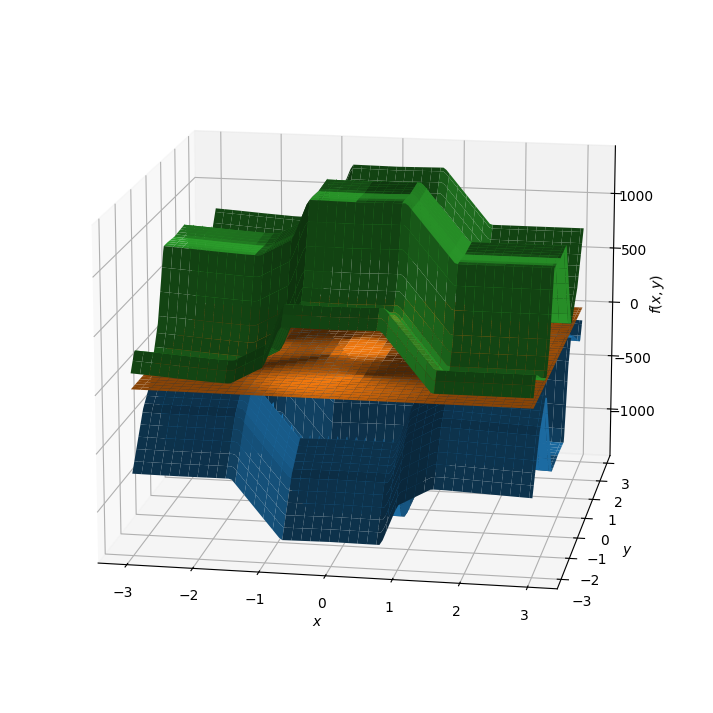

In [9]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.plot_surface(matx, maty, matfu)
ax.plot_surface(matx, maty, matf)
ax.plot_surface(matx, maty, matfo)
ax.view_init(elev=15, azim=280)

plt.show()

In [10]:
def distance_SR( xI, yI, P, M ):

    xSR, ySR = pymc.PWLSVar( mod, 0, xI, P ), pymc.PWLSVar( mod, 1, yI, P )
    zSR = fSR( xSR, ySR )

    matx = np.outer(np.linspace(xI.l, xI.u, M), np.ones(M))
    maty = np.outer(np.ones(M), np.linspace(yI.l, yI.u, M))

    distumax,  distomax  = 0, 0
    fmin, fmax = f( matx[0,0], maty[0,0]), f( matx[0,0], maty[0,0])

    for i,j in product(range(M),range(M)):

        fval = f( matx[i,j], maty[i,j])
        uval, oval = zSR.uval({0:matx[i,j],1:maty[i,j]}), zSR.oval({0:matx[i,j],1:maty[i,j]})

        distu = fval - uval
        if distumax < distu:
            distumax = distu

        disto = oval - fval
        if distomax < disto:
            distomax = disto

        if fmin > fval:
            fmin = fval

        if fmax < fval:
            fmax = fval

    #print( zSR.l, fmin, fmax, zSR.u )
    return max( distumax, distomax ), max( fmin - zSR.l(), zSR.u() - fmax )

In [11]:
def distance_MC( xI, yI ):

    matx = np.outer(np.linspace(xI.l, xI.u, M), np.ones(M))
    maty = np.outer(np.ones(M), np.linspace(yI.l, yI.u, M))

    distumax,  distomax  = 0, 0
    fmin, fmax = f( matx[0,0], maty[0,0]), f( matx[0,0], maty[0,0])
    umin, omax = fmin, fmax

    for i,j in product(range(M),range(M)):

        xMC, yMC = pymc.McCormick( xI, matx[i,j] ), pymc.McCormick( yI, maty[i,j] )
        zMC = fSR( xMC, yMC )

        fval = f( matx[i,j], maty[i,j])
        uval, oval = zMC.cv, zMC.cc

        distu = fval - uval
        if distumax < distu:
            distumax = distu

        disto = oval - fval
        if distomax < disto:
            distomax = disto

        if fmin > fval:
            fmin = fval

        if fmax < fval:
            fmax = fval

        if umin > uval:
            umin = uval

        if omax < oval:
            omax = oval

    return max( distumax, distomax ), max( fmin - umin, omax - fmax )

In [12]:
print( distance_SR( xI, yI, P, 128 ) )
print( distance_MC( xI, yI ) )

(1385.804765614384, 1376.7050361646207)
(2734.9534858191055, 2727.86942469096)


In [13]:
def red( bnd, ref, rho ):
    return rho * bnd + (1-rho) * ref

def cvgrate_SR( xI, yI, xr, yr, P, M, rhomin ):
    rho = 1
    rate = 0.95
    result = []
    
    while( rho > 1e-2 ):
        xIred, yIred = red( xI, xr, rho ), red( yI, yr, rho )
        pointdist, hausdist = distance_SR( xIred, yIred, P, M )
        #print( rho, xIred, yIred, pointdist, hausdist )
        result.append( [rho, pointdist, hausdist] )
        rho *= rate

    return np.array( result ) 

def cvgrate_MC( xI, yI, xr, yr, rhomin ):
    rho = 1
    result = []
    
    while( rho > 1e-2 ):
        xIred, yIred = red( xI, xr, rho ), red( yI, yr, rho )
        pointdist, hausdist = distance_MC( xIred, yIred )
        #print( xIred, yIred, rho, pointdist, hausdist )
        result.append( [rho, pointdist, hausdist] )
        rho *= 0.95

    return np.array( result )

In [14]:
M = 128
rhomin = 1e-2

xI, yI = pymc.Interval(-3,3), pymc.Interval(-3,3)
xr, yr = -1.059997e-02, 1.580344e+00 #(global max) 2.288469e-01, -1.626050e+00 (global min)

#xI, yI = pymc.Interval(-2,1), pymc.Interval(-1,2)
#xr, yr = pymc.mid(xI), pymc.mid(yI) #0, 0

rate1 = cvgrate_SR( xI, yI, xr, yr, 1, M, rhomin )
rate2 = cvgrate_SR( xI, yI, xr, yr, 2, M, rhomin )
rate4 = cvgrate_SR( xI, yI, xr, yr, 4, M, rhomin )
rate8 = cvgrate_SR( xI, yI, xr, yr, 8, M, rhomin )

rateMC = cvgrate_MC( xI, yI, xr, yr, rhomin )

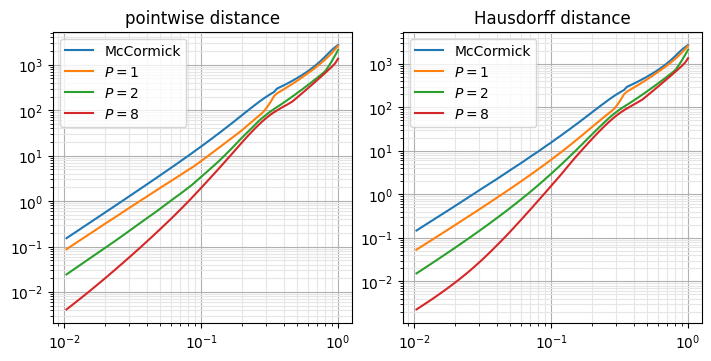

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize=(7, 7/2))

# pointwise distance
ax1.loglog( rateMC[:,0], rateMC[:,1], label="McCormick" )
ax1.loglog( rate1[:,0], rate1[:,1], label="$P=1$" )
ax1.loglog( rate2[:,0], rate2[:,1], label="$P=2$" )
#ax1.loglog( rate4[:,0], rate4[:,1], label="$P=4$" )
ax1.loglog( rate8[:,0], rate8[:,1], label="$P=8$" )
ax1.set(title='pointwise distance')
ax1.grid()
ax1.grid(which="minor", color="0.9")
ax1.legend()

# pointwise distance
ax2.loglog( rateMC[:,0], rateMC[:,2], label="McCormick" )
ax2.loglog( rate1[:,0], rate1[:,2], label="$P=1$" )
ax2.loglog( rate2[:,0], rate2[:,2], label="$P=2$" )
#ax2.loglog( rate4[:,0], rate4[:,2], label="$P=4$" )
ax2.loglog( rate8[:,0], rate8[:,2], label="$P=8$" )
ax2.set(title='Hausdorff distance')
ax2.grid()
#ax2.set_ylim(ymin=1e-4)
ax2.grid(which="minor", color="0.9")
ax2.legend()